In [38]:
import numpy as np
import scipy
import scipy.spatial
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
import plotly.express as px
from sklearn.preprocessing import StandardScaler



In [39]:
df = pd.read_csv("Country-data.csv", sep=',', index_col=0)
df.head(6)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300


- Quantos países existem no dataset? 

    - Existem 167 paises

In [40]:
df.shape

(167, 9)

Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


Histograma das caracteristicas dos paises

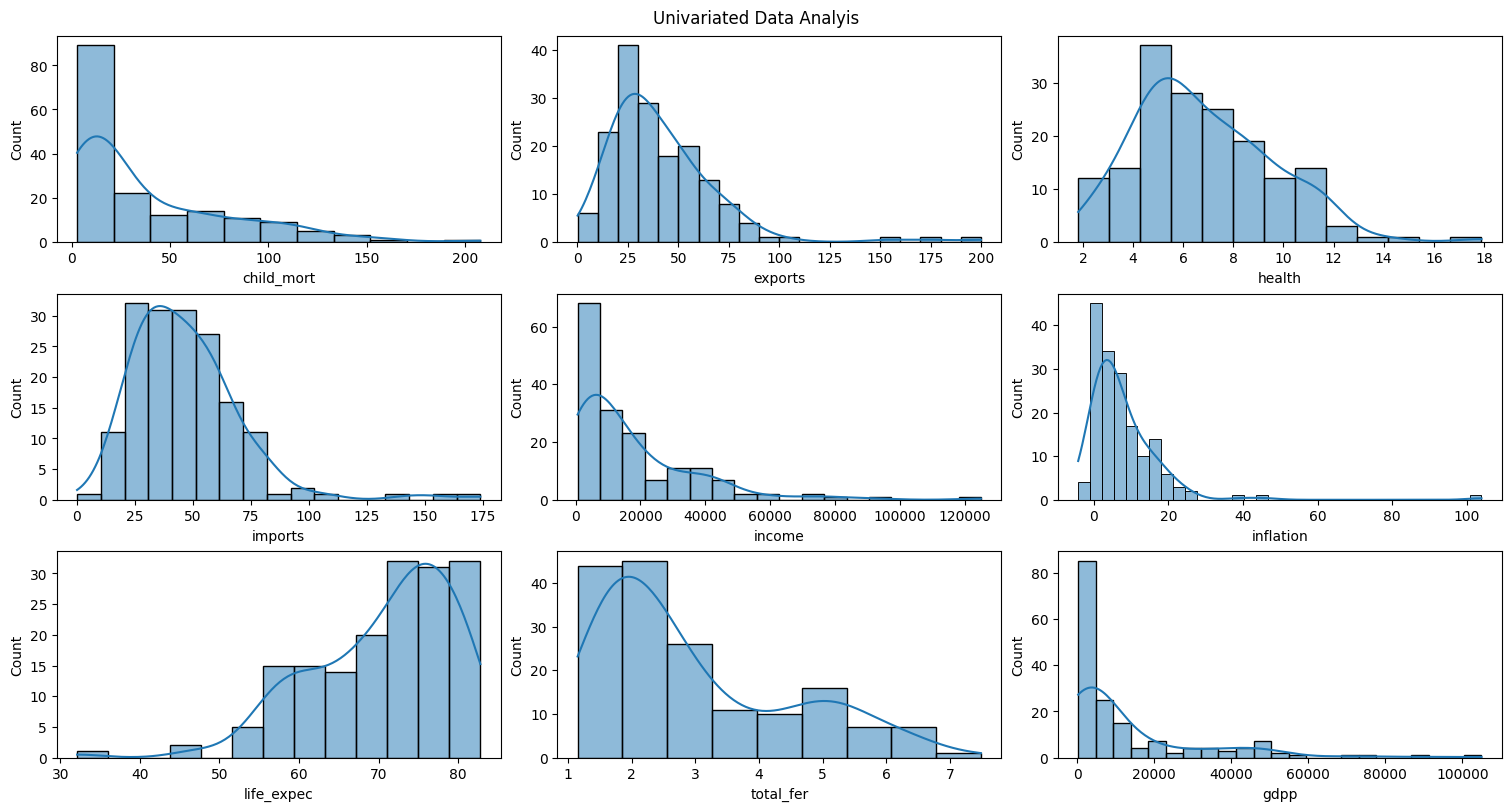

In [42]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
plt.suptitle("Univariated Data Analyis")
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.histplot(df[i], ax=ax[x], kde=True)

BoxPlot dos atributos dos paises para identificar possíveis outliers

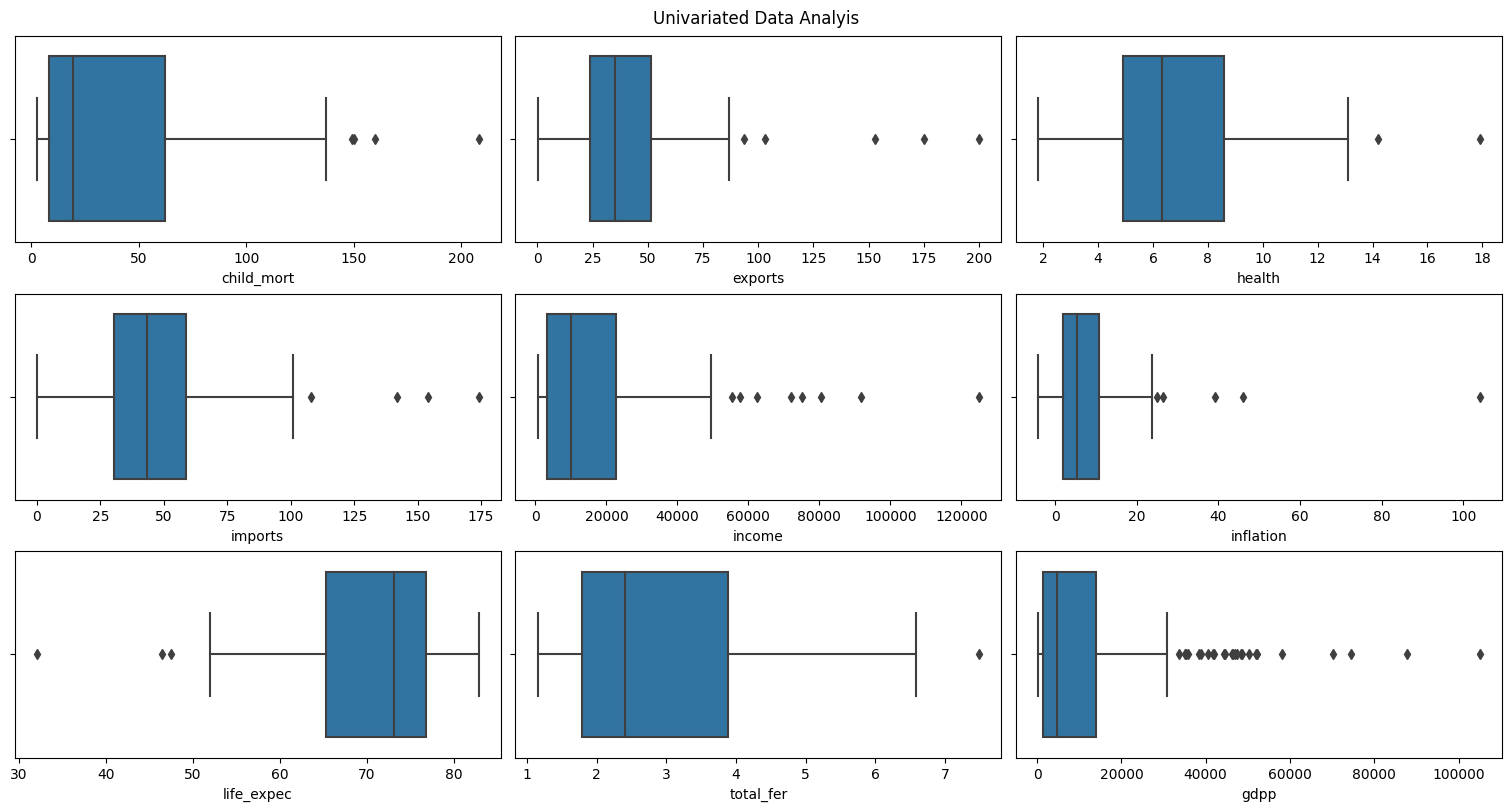

In [43]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
plt.suptitle("Univariated Data Analyis")
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(x=df[i], ax=ax[x])

Income x Imports

<AxesSubplot:xlabel='income', ylabel='imports'>

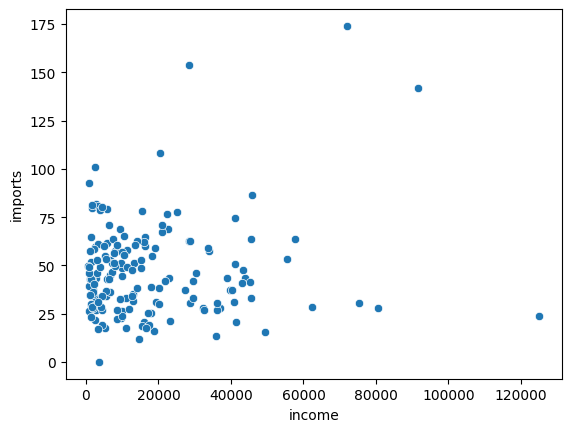

In [44]:
sns.scatterplot(x='income',y='imports',data=df)

Income x Gdpp

<AxesSubplot:xlabel='income', ylabel='gdpp'>

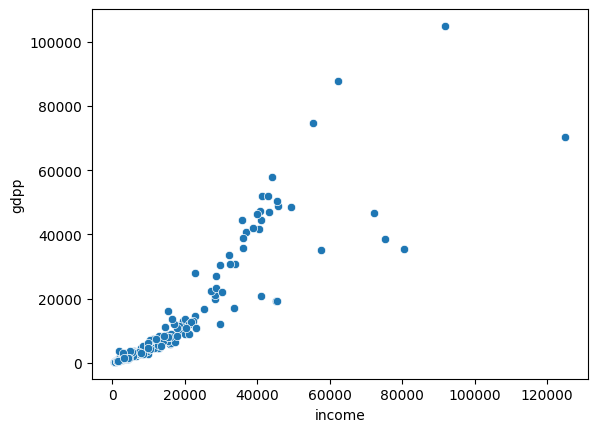

In [45]:
sns.scatterplot(x='income',y='gdpp',data=df)

Exports x Income

<AxesSubplot:xlabel='income', ylabel='exports'>

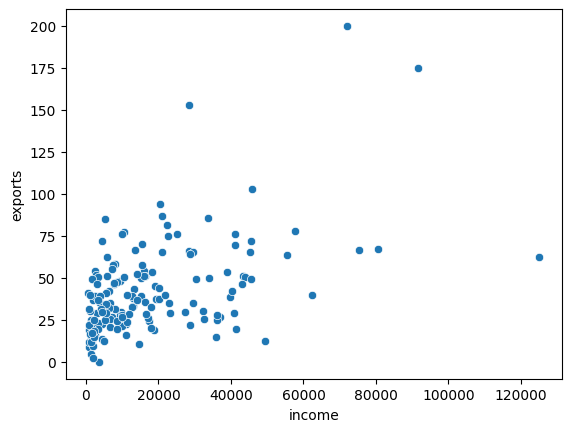

In [46]:
sns.scatterplot(x='income',y='exports',data=df)

Relação das importações, exportações e GDPP, é possível analisar que Malta, Luxemburgo e Singapura são outliers

In [47]:
px.scatter(data_frame=df, x='exports', y='imports',size='gdpp', text=df.index, color='gdpp', title='Countries by Export & Import and corresponding GDP')

In [48]:
for i in int_cols:
    fig=px.choropleth(data_frame=df, locationmode='country names', locations=df.index, color=i, title=f'{i} rate by countries')
    fig.show()

## Mapa de calor

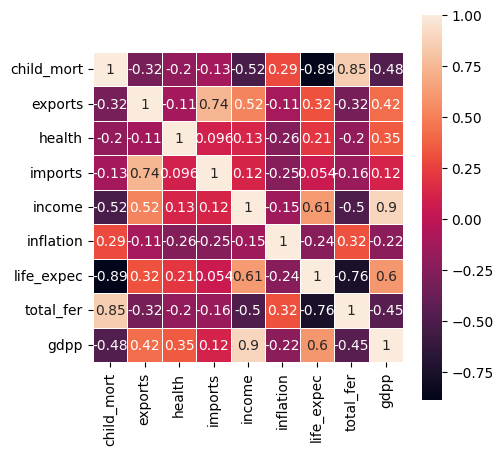

In [49]:
corr = df.corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr, square=True, linewidths=.5, annot=True);

Analisando esses dados e gráficos é possível notar que existem outliers em alguns parâmetros e que os dados não estão normalizados, portanto é necessário utilizar um algorítimo que seja robusto a outliers e normalização antes de inicar a clusterização.

# Pré-processamento


## Normalização

In [50]:

scale = StandardScaler()
sData = pd.DataFrame(scale.fit_transform(df), columns = df.columns) # Scaled Data
sData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,-3.722904e-17,1.003008,-0.887138,-0.746619,-0.471798,0.592667,4.221297
exports,167.0,2.127373e-16,1.003008,-1.500192,-0.633337,-0.223528,0.374720,5.813835
health,167.0,5.504579e-16,1.003008,-1.827827,-0.692211,-0.181001,0.651541,4.047436
imports,167.0,2.765585e-16,1.003008,-1.939940,-0.691479,-0.148743,0.491353,5.266181
income,167.0,-7.977650e-17,1.003008,-0.860326,-0.717456,-0.373808,0.294237,5.611542
inflation,167.0,-1.063687e-17,1.003008,-1.137852,-0.566641,-0.226950,0.281636,9.129718
life_expec,167.0,3.696311e-16,1.003008,-4.337186,-0.592758,0.286958,0.704258,1.380962
total_fer,167.0,3.044803e-16,1.003008,-1.191250,-0.763902,-0.356431,0.617525,3.009349
gdpp,167.0,5.850277e-17,1.003008,-0.696801,-0.636660,-0.454431,0.059421,5.036507


BoxPlot do dataset após a normalização

<AxesSubplot:>

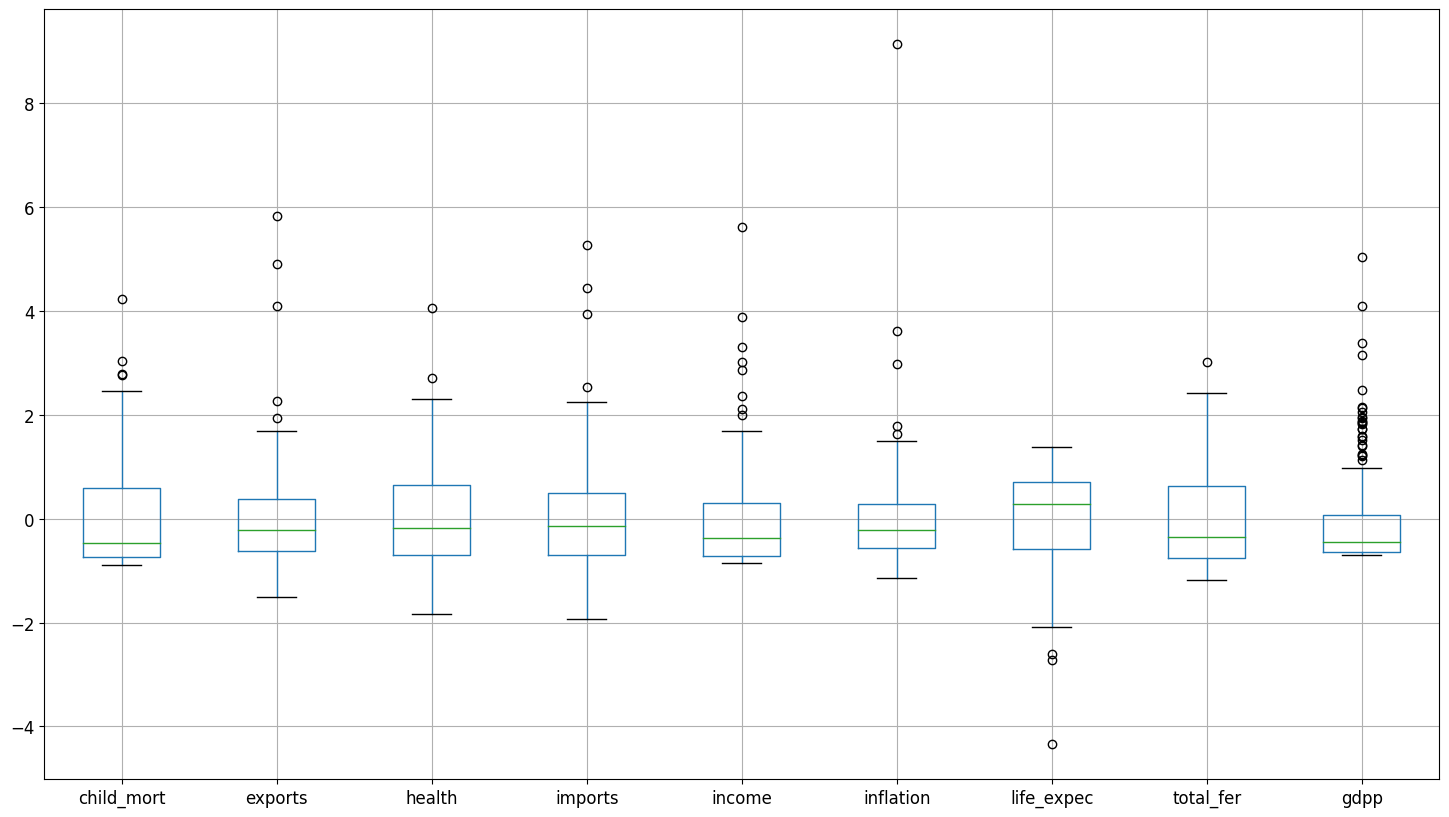

In [51]:
sData.boxplot(fontsize = 'large', figsize = (18, 10))

# K-médias

Para rodar o K-médias, primeiro é criado uma PCA do dataset inicial, para fins de visualização, e após o algorítimo K-médias define os países em 3 grupos
Os centroídes são representados pelos pontos em preto e os clusters em azul, laranja e verde.

In [52]:
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(sData), columns=['PC1','PC2']) 


C:\Users\lucas\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='PC1', ylabel='PC2'>

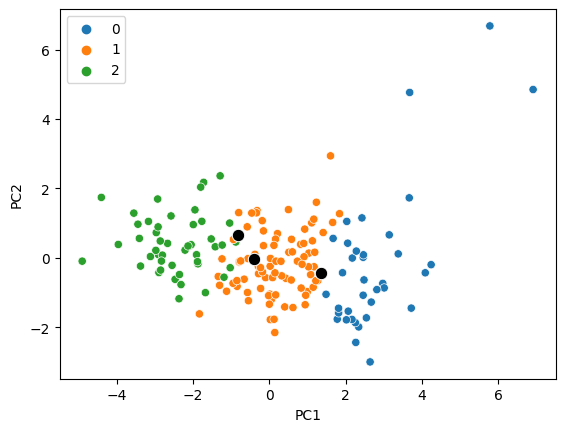

In [53]:
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(sData)
pca_data['K-means'] = pd.Categorical(k_fit.labels_)

sns.scatterplot(x="PC1", y="PC2", hue="K-means", data=pca_data, ax=None)
sns.scatterplot(k_fit.cluster_centers_[:,0] , k_fit.cluster_centers_[:,1] , s = 80, color = 'k')

In [54]:
clusters = k_fit.labels_
cluster_df = pca_data.copy()
cluster_df.index = df.index
cluster_df.head()

,PC1,PC2,K-means
country,,,
Afghanistan,-2.913025,0.095621,2
Albania,0.429911,-0.588156,1
Algeria,-0.285225,-0.455174,1
Angola,-2.932423,1.695555,2
Antigua and Barbuda,1.033576,0.136659,1


K-médias - Qual a distribuição das dimensões em cada grupo?

Grupo 1 - 84 países

Grupo 2 - 47 países

Grupo 3 - 36 países


In [55]:
cluster_df['K-means'].value_counts()

1    84
2    47
0    36
Name: K-means, dtype: int64

Posição dos centróides

In [56]:
cluster_df.groupby('K-means').mean()

,PC1,PC2
K-means,,
0,2.769773,-0.213014
1,0.175182,-0.138827
2,-2.434620,0.411276


Algoritimo para descobrir qual o país mais próximo do centróide de cada grupo

In [57]:
import math
def distancia2d(x1, y1, x2, y2):
  a = x2 - x1
  b = y2 - y1
  c = math.sqrt(math.pow(a, 2) + math.pow(b, 2))
  return c

In [65]:
thr1 = 1000000
thr2 = 1000000
thr3 = 1000000
dataMean0 = cluster_df
dataMean1 = cluster_df['PC1'][1]
dataMean2 = cluster_df['PC1'][2]

dataMean1

# Percorre todas as colunas do dataset para cada uma das datas
for i, data in cluster_df.iterrows():
    # Definindo o estado inicial das variáveis
    if data['K-means'] == 2:
        if distancia2d(data['PC1'], data['PC2'],-2.434620, 0.411276) < thr1:
            thr1= distancia2d(data['PC1'], data['PC2'], -2.434620, 0.411276)
            dataMean0 = data
    if data['K-means'] == 0:
        if distancia2d(data['PC1'], data['PC2'], 2.769773, -0.213014) < thr2:
            thr2 = distancia2d(data['PC1'], data['PC2'], 2.769773,  -0.213014)
            dataMean1 = data
    if data['K-means'] == 1:
        if distancia2d(data['PC1'], data['PC2'], 0.175182,  -0.138827) < thr3:
            thr3 =  distancia2d(data['PC1'], data['PC2'], 0.175182,  -0.138827)
            dataMean2 = data


País que melhor representa o cluster 0: Brunei

País que melhor representa o cluster 1: Suriname

País que melhor representa o cluster 2: Benin

In [66]:
print(dataMean0)
print(dataMean1)
print(dataMean2)

PC1            -2.672314
PC2             0.418172
K-means         2.000000
hierarchical    1.000000
Name: Benin, dtype: float64
PC1             2.460086
PC2             0.016454
K-means         0.000000
hierarchical    0.000000
Name: Brunei, dtype: float64
PC1             0.171675
PC2            -0.094808
K-means         1.000000
hierarchical    2.000000
Name: Suriname, dtype: float64


# Clusterização Hierárquica

Text(0, 0.5, 'Euclidean Distance')

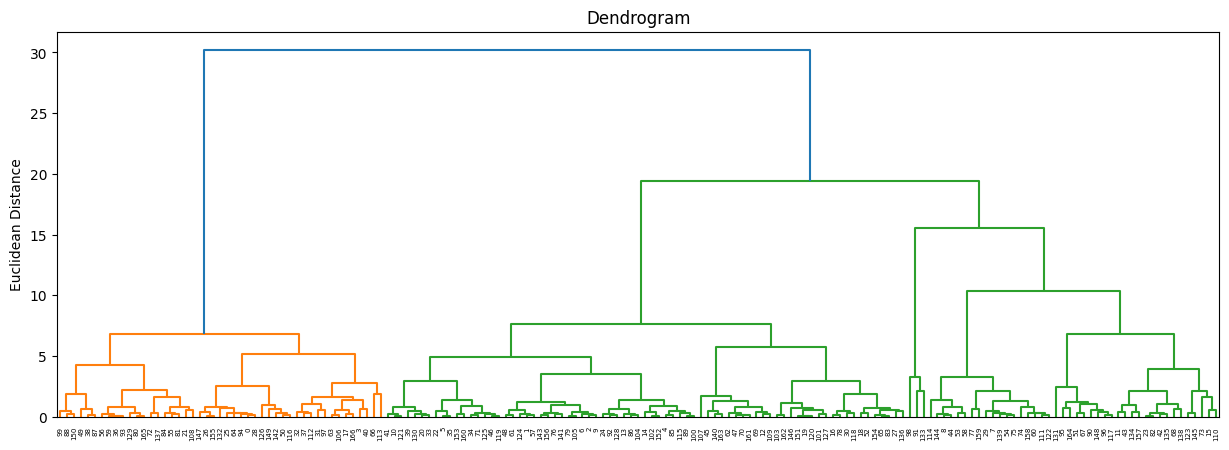

In [60]:

import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15, 5))
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(pca_data, method='ward'), labels=pca_data.index)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

In [61]:
from sklearn.cluster import AgglomerativeClustering
AggCluster=AgglomerativeClustering(3)
AggCluster.fit(pca_data)
cluster_df['hierarchical']=AggCluster.labels_

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

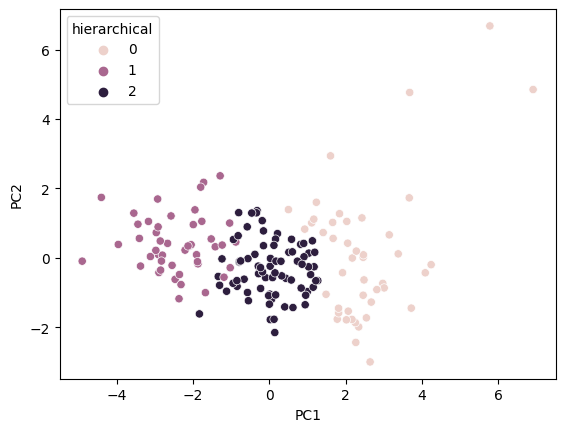

In [62]:
sns.scatterplot(x="PC1", y="PC2", hue="hierarchical", data=cluster_df, ax=None)

Fundamentalmente o algorítimo K-médias significa agrupar simplesmente uma divisão do conjunto de objetos de dados em subconjuntos não sobrepostos (clusters), de modo que cada objeto de dados esteja em exatamente um subconjunto). Enquanto que um clustering hierárquico é um conjunto de clusters aninhados que são organizados como uma árvore.

Apesar do cluster hierárquico ser mais robusto a outliers, os dois tipos de algorítimos apresentaram um bom resultado e na média os paises percentem ao mesmos clusters nos dois algorítimos.

Essa divisão em 3 clusters classifica os paises menos desenvolvidos, os em desenvolvimentos e os desenvolvidos, com base em alguns paramêtros apresentados nesse dataset.

No gráfico baseado na clusterização k-means, em Laranja são os paises em desenvolvimento, em verde os países desenvolvidos e em azul são os paises menos desenvolvidos.

No gráfico baseado na clusterização hierarquica, em amarelo são os paises em desenvolvimento, em azul os países desenvolvidos e em rosa são os paises menos desenvolvidos.


In [63]:
px.choropleth(data_frame=cluster_df, locationmode='country names', locations=df.index, color='K-means', title=f'Classificação dos paises K-means')

In [64]:
px.choropleth(data_frame=cluster_df, locationmode='country names', locations=df.index, color='hierarchical', title=f'Classificação dos paises HCA')

- Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.

    1. Inicializar k centróides em pontos aleatórios

    2. Para cada ponto, encontrar qual o centróide mais próximo

    3. Calcular o baricentro dos pontos para cada centróide

    4. Mover o centróide na direção do seu baricentro

    5. Repetir a partir de 2.

        O algoritmo converge quando o movimento for menor que um valor pré-definido ou
    quando o número de iterações pré-especificado for atingido.




- O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.

    - O medoide é a média dos obejtos que estão no cluster, que necessariamente pertence ao conjuto, o ponto medio do cluster sempre pertence ao cluster, necessariamente é um ponto do conjunto. 

    Etapas do algoritimo:

    1) selecionar K 

    2) calcular matriz  de dissimilaridade

    3) atribuir cada obejto para o medoide mais próximo

    4) para cada cluster, observar se existe algum objeto que diminui o coeficiente de dissimilaridade e se existir, usar como novo medoide

    5) repetir passo 3


- O algoritmo de K-médias é sensível a outliers nos dados. Explique.
 
    - Como no algoritimo K-médias, o centroide é baseado na média dos pontos, um outiler desloca consideravelmente o centroide, ou seja, o centroide fica longe dos pontos que realmente compoem o cluster, por isso é essencial tratar os outliers para garantir que o cluster realmente represente os dados que o compoem. 


- Por que o algoritmo de DBScan é mais robusto à presença de outliers?

  - No algorítimo do DBScan, cada tipo de ponto é determinado baseado em uma caracterista, cada ponto de dados em nosso conjunto de dados pode ser um dos seguintes:

    - Ponto central: Um ponto de dados é um ponto central se houver pelo menos M pontos em sua vizinhança, ou seja, dentro do raio especificado (R).

    - Ponto de fronteira: um ponto de dados é classificado como ponto de fronteira se: Sua vizinhança contém menos de M pontos de dados, ou É alcançável a partir de algum ponto central, ou seja, está dentro da distância R de um ponto central.

    - Ponto Outlier: Um outlier é um ponto que não é um ponto central e, também, não está próximo o suficiente para ser alcançado a partir de um ponto central.
Os pontos discrepantes são eliminados.
